In [9]:
!pip install tensorflow
import numpy as np  # Importing NumPy for numerical operations and array manipulations
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting graphs and visualizations
import seaborn as sns  # Importing Seaborn for statistical data visualization, built on top of Matplotlib
import tensorflow as tf  # Importing TensorFlow for building and training machine learning models
from tensorflow import keras  # Importing Keras, a high-level API for TensorFlow, to simplify model building
from tensorflow.keras import Layer  # Importing Layer class for creating custom layers in Keras
from tensorflow.keras.models import Sequential  # Importing Sequential model for building neural networks layer-by-layer
from tensorflow.keras.layers import Rescaling , GlobalAveragePooling2D
from tensorflow.keras import layers, optimizers, callbacks  # Importing various modules for layers, optimizers, and callbacks in Keras
from sklearn.utils.class_weight import compute_class_weight  # Importing function to compute class weights for imbalanced datasets
from tensorflow.keras.applications import EfficientNetV2B2  # Importing EfficientNetV2S model for transfer learning
from sklearn.metrics import confusion_matrix, classification_report  # Importing functions to evaluate model performance
#import gradio as gr  # Importing Gradio for creating interactive web interfaces for machine learning models

In [17]:
dataset_dir= r"C:\Users\hp\Downloads\garbage\garbage\TrashType_Image_Dataset"
image_size = (124, 124)
batch_size = 32
seed = 42

In [19]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    shuffle = True,
    image_size=image_size,
    batch_size=batch_size
)

Found 18 files belonging to 6 classes.
Using 15 files for training.


In [21]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    shuffle = True,
    image_size=image_size,
    batch_size=batch_size
)
val_class= val_ds.class_names

Found 18 files belonging to 6 classes.
Using 3 files for validation.


In [23]:
# Get the total number of batches in the validation dataset
val_batches = tf.data.experimental.cardinality(val_ds)  

# Split the validation dataset into two equal parts:
# First half becomes the test dataset
test_ds = val_ds.take(val_batches // 2)  

# Second half remains as the validation dataset
val_dat = val_ds.skip(val_batches // 2)  

# Optimize test dataset by caching and prefetching to improve performance
test_ds_eval = test_ds.cache().prefetch(tf.data.AUTOTUNE)  

In [25]:
print(train_ds.class_names)
print(val_class)
print(len(train_ds.class_names))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
6


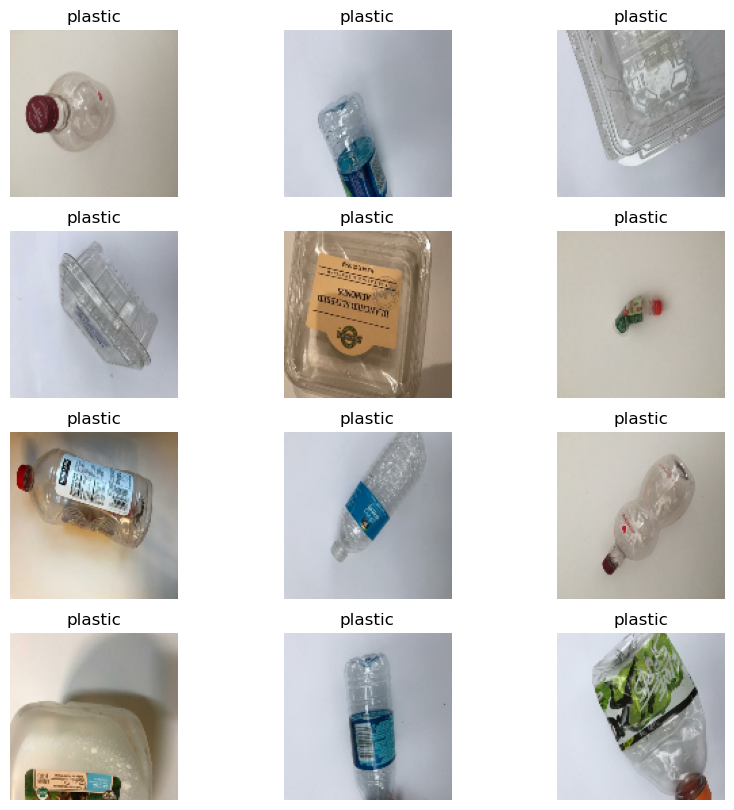

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [47]:
def count_distribution(dataset, class_names):
    total = 0
    counts = {name: 0 for name in class_names}
    
    for _, labels in dataset:
        for label in labels.numpy():
            class_name = class_names[label]
            counts[class_name] += 1
            total += 1

    if total == 0:
        print("⚠️ Warning: Empty dataset passed.")
        return {name: 0 for name in class_names}

    for k in counts:
        counts[k] = round((counts[k] / total) * 100, 2)

    return counts

In [49]:
def simple_bar_plot(dist, title):
    plt.bar(dist.keys(), dist.values(), color='cornflowerblue')
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

In [51]:
class_names = train_ds.class_names

# Get class distributions
train_dist = count_distribution(train_ds, class_names)
val_dist = count_distribution(val_ds, class_names)
test_dist = count_distribution(test_ds, class_names)
overall_dist = {}
for k in class_names:
    overall_dist[k] = round((train_dist[k] + val_dist[k]) / 2, 2)

print(train_dist)
print(val_dist)
print(test_dist)
print(overall_dist)


⚠️ Warning: Empty dataset passed.
{'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}
{'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}
{'cardboard': 0, 'glass': 0, 'metal': 0, 'paper': 0, 'plastic': 0, 'trash': 0}
{'cardboard': 0.0, 'glass': 0.0, 'metal': 0.0, 'paper': 0.0, 'plastic': 100.0, 'trash': 0.0}


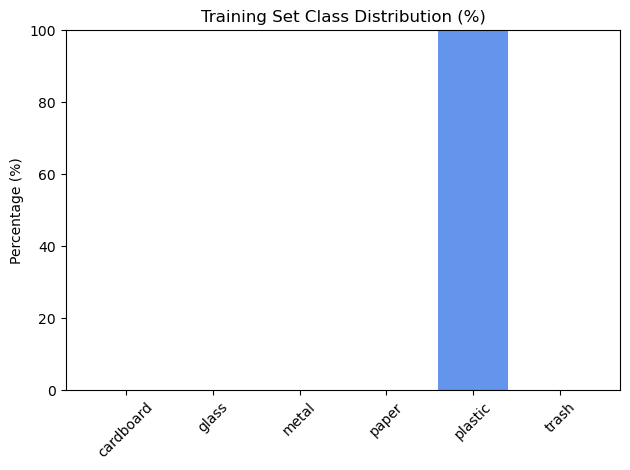

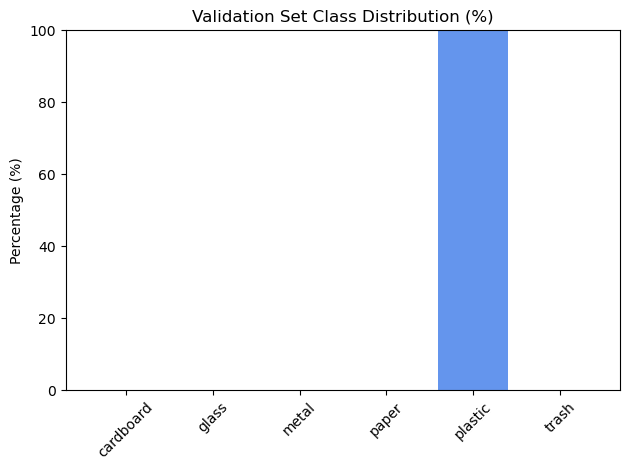

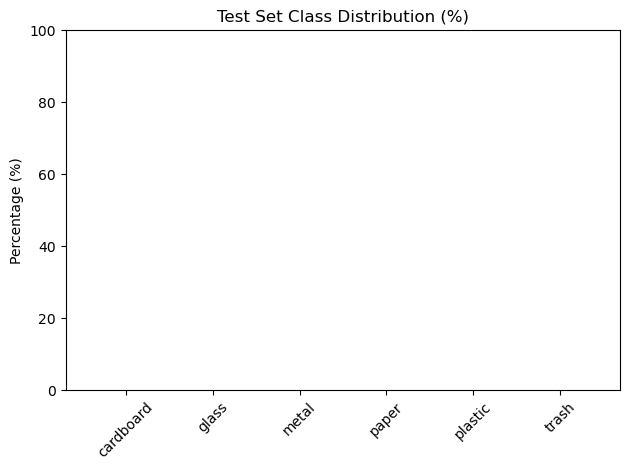

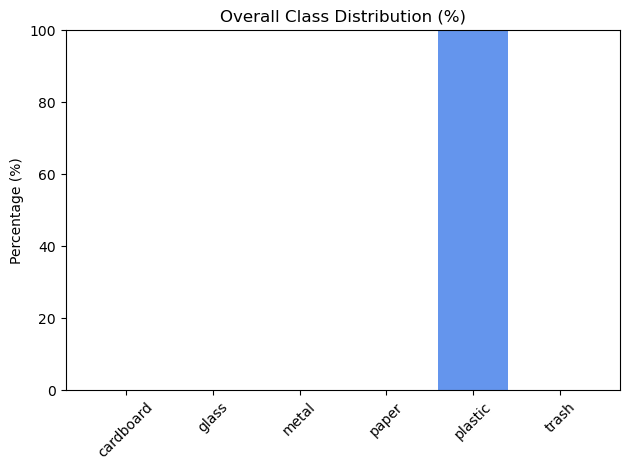

In [53]:
# Show visualizations
simple_bar_plot(train_dist, "Training Set Class Distribution (%)")
simple_bar_plot(val_dist, "Validation Set Class Distribution (%)")
simple_bar_plot(test_dist, "Test Set Class Distribution (%)")
simple_bar_plot(overall_dist, "Overall Class Distribution (%)")

In [1]:
# Count class occurrences and prepare label list
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_counts = {i: 0 for i in range(len(class_names))}
all_labels = []

for images, labels in train_ds:
    for label in labels.numpy():
        label = int(label)              # ensure it's a pure int
        class_counts[label] += 1
        all_labels.append(label)

# Compute class weights
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(len(class_names)),  # e.g., [0, 1, 2, 3]
    y=all_labels                          # list of ints
)

# Map index to weight
class_weights = {i: w for i, w in enumerate(class_weights_array)}
# ✅ Optional: print results
print("Class Counts:", class_counts)
print("Class Weights:", class_weights)


NameError: name 'class_names' is not defined